# NMF: Nonnegative Matrix Factorization

## Installation of required modules

If not already installed, first execute in the Julia REPL: 

```julia
import Pkg
Pkg.add("NMF")
Pkg.add("NMFk")
Pkg.add("Cairo")
Pkg.add("Fontconfig")
Pkg.add("Mads")
```

## Loading required modules in Julia

In [1]:
import NMF
import Cairo
import Fontconfig
import Mads
import NMFk
import Random

## Synthetic problem setup 

Let us generate 3 random signals:

In [2]:
Random.seed!(2020)

a = rand(15)
b = rand(15)
c = rand(15)

[a b c]

15×3 Matrix{Float64}:
 0.142462  0.584861   0.0114154
 0.932369  0.879126   0.0843485
 0.854813  0.0117389  0.425011
 0.937677  0.996272   0.156803
 0.924093  0.54395    0.139585
 0.536817  0.9808     0.268725
 0.651958  0.292807   0.12339
 0.559449  0.966975   0.696218
 0.47232   0.0208151  0.670082
 0.443744  0.129661   0.03678
 0.155675  0.996939   0.561393
 0.506974  0.997233   0.510147
 0.4971    0.387649   0.708557
 0.850975  0.328333   0.240079
 0.485892  0.104009   0.573059

The singals look like this:

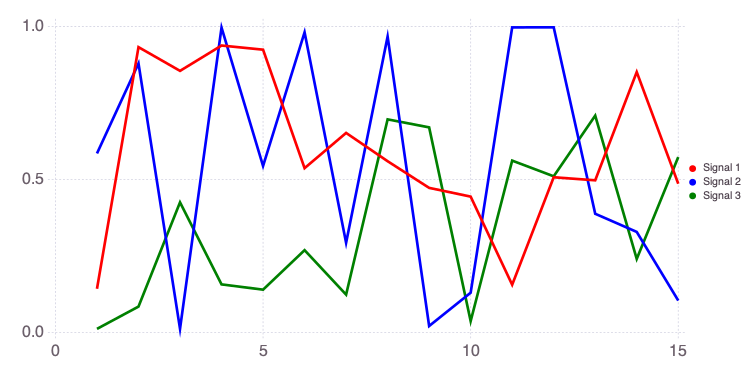

In [3]:
Mads.plotseries([a b c])

We can collect the 3 signal vectors into a signal matrix `W`:

In [4]:
W = [a b c]

15×3 Matrix{Float64}:
 0.142462  0.584861   0.0114154
 0.932369  0.879126   0.0843485
 0.854813  0.0117389  0.425011
 0.937677  0.996272   0.156803
 0.924093  0.54395    0.139585
 0.536817  0.9808     0.268725
 0.651958  0.292807   0.12339
 0.559449  0.966975   0.696218
 0.47232   0.0208151  0.670082
 0.443744  0.129661   0.03678
 0.155675  0.996939   0.561393
 0.506974  0.997233   0.510147
 0.4971    0.387649   0.708557
 0.850975  0.328333   0.240079
 0.485892  0.104009   0.573059

Now we can mix the signals in matrix `W` to produce a data matrix `X` representing data.

Let us assume that there are 5 sensors (e.g., 5 measurement devices or wells at different locations).

Each of the 5 sensors is observing some mixture of the original signals in `W`.

The way the 3 signals are mixed at the sensors is represented by the mixing matrix `H`.

Let us define the mixing matrix `H` as:

In [5]:
H = [1 10 0 0 1; 0 1 1 5 2; 3 0 0 1 5]

3×5 Matrix{Int64}:
 1  10  0  0  1
 0   1  1  5  2
 3   0  0  1  5

Each column of the `H` matrix defines how the 3 signals are represented in each sensors.

For example, the first sensor (column 1 above) detects only Signals 1 and 3; Signal 2 is missing because `H[2,1]` is equal to zero.

The second sensor (column 2 above) detects Signals 1 and 2; Signal 3 is missing because `H[3,2]` is equal to zero.

The entries of `H` matrix also define the proportions at which the signals are mixed.

For example, the first sensor (column 1 above) detects Signal 3 times stronger than Signal 1.

The data matrix `X` is formed by multiplying `W` and `H` matrices. 

`X` matrix defines the actual data observed:

In [6]:
X = W * H

15×5 Matrix{Float64}:
 0.176708   2.00948  0.584861   2.93572   1.36926
 1.18541   10.2028   0.879126   4.47998   3.11236
 2.12985    8.55987  0.0117389  0.483706  3.00335
 1.40809   10.373    0.996272   5.13817   3.71424
 1.34285    9.78488  0.54395    2.85934   2.70992
 1.34299    6.34897  0.9808     5.17273   3.84204
 1.02213    6.81239  0.292807   1.58743   1.85452
 2.6481     6.56146  0.966975   5.53109   5.97449
 2.48257    4.74401  0.0208151  0.774157  3.86436
 0.554085   4.5671   0.129661   0.685083  0.886966
 1.83985    2.55369  0.996939   5.54609   4.95652
 2.03741    6.06697  0.997233   5.49631   5.05217
 2.62277    5.35865  0.387649   2.6468    4.81519
 1.57121    8.83808  0.328333   1.88175   2.70804
 2.20507    4.96293  0.104009   1.09311   3.55921

The data matrix `X` looks like this:

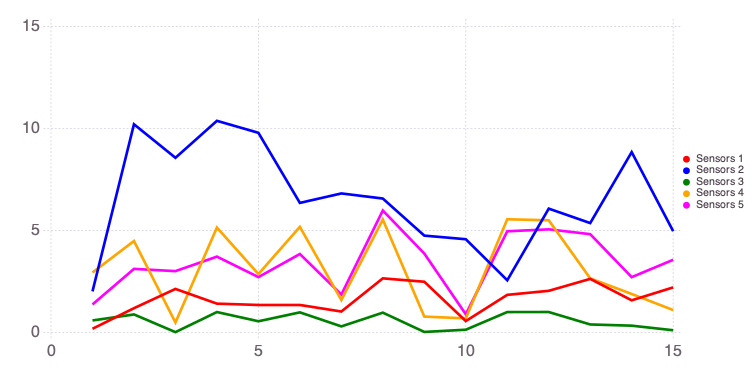

In [7]:
Mads.plotseries(X; name="Sensors")

## NMF analysis

Now, we can assume that we only know the data matrix `X` and the `W` and `H` matrices are unknown.

We can execute **NMF** and analyze the data matrix `X`.

**NMF** will automatically:

- estimate the shape of the unknown mixed signals (i.e., estimate the entries of `W` matrix)
- estimate how the signals are mixed at each sensor (i.e., estimate the entries of `H` matrix)

This can be done based only on the information in `X`:

However, **NMF** requires prior knowledge about the number of signatures in the dataset.

In [8]:
k = 3
nmfresults = NMF.nnmf(X, k; alg=:multmse, maxiter=1000, tol=1.0e-4)
We = nmfresults.W
He = nmfresults.H
println("NMF iterations:", nmfresults.niters)
println("NMF convergence: ", nmfresults.converged)
println("NMF objective function: ", nmfresults.objvalue)

NMF iterations:571
NMF convergence: true
NMF objective function: 0.028891611118344502


**NMF** returns an object containing estimates of `W` and `H` matrices.

**NMF** also return the number of iteration for the convergence, convergence status, and objective function value.

The estimate of `W` is:

In [9]:
We

15×3 Matrix{Float64}:
 0.37623   0.765884     1.75055e-42
 1.93254   1.07533      1.82402e-7
 1.61806   1.59435e-28  0.70176
 1.96276   1.25034      0.131726
 1.85266   0.635153     0.135698
 1.19805   1.31904      0.370687
 1.28975   0.331514     0.147938
 1.23279   1.40992      1.14916
 0.891028  0.13458      1.18004
 0.865412  0.118756     0.0202871
 0.474273  1.47535      0.935238
 1.14135   1.40958      0.812108
 1.00609   0.637882     1.2205
 1.67236   0.380675     0.341129
 0.933591  0.219578     0.995775

The estimate of `H` is:

In [10]:
He

3×5 Matrix{Float64}:
 0.596812   5.27462    0.0334418    0.291794    0.762289
 0.0198418  0.0119867  0.694161     3.66185     1.50487
 1.64474    0.0366189  3.30635e-35  1.59289e-5  2.53156

Note that the order of columns ('signals') in `W` and `We[kopt]` are not expected to match.

Also note that the order of rows ('sensors') in `H` and `He[kopt]` are also not expected to match.

The estimated order of `signals` will be different every time the code is executed.

Below are plots providing comparisons between the original and estimated `W` an `H` matrices.


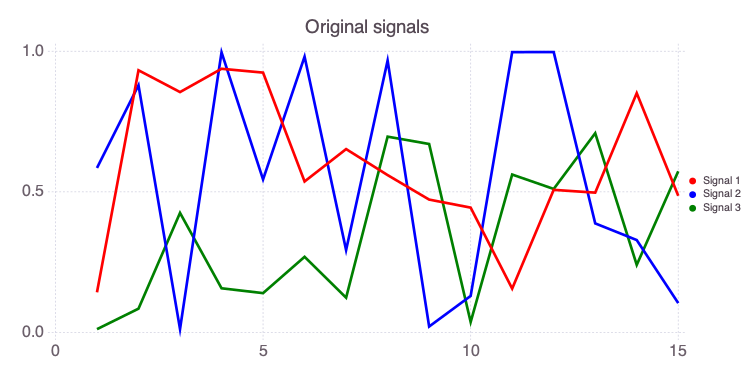

In [11]:
Mads.plotseries(W; title="Original signals")

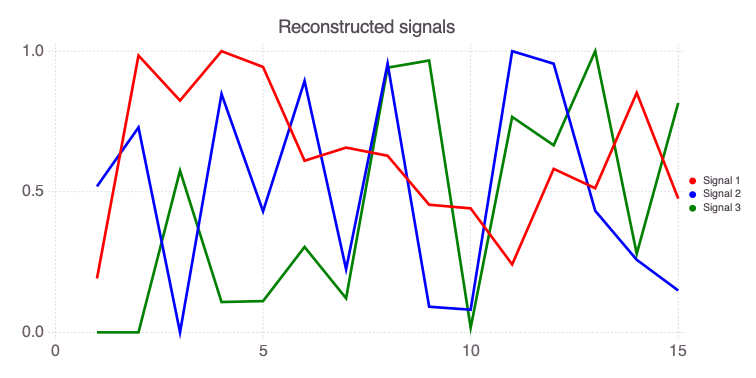

In [12]:
Mads.plotseries(We ./ maximum(We; dims=1); title="Reconstructed signals")

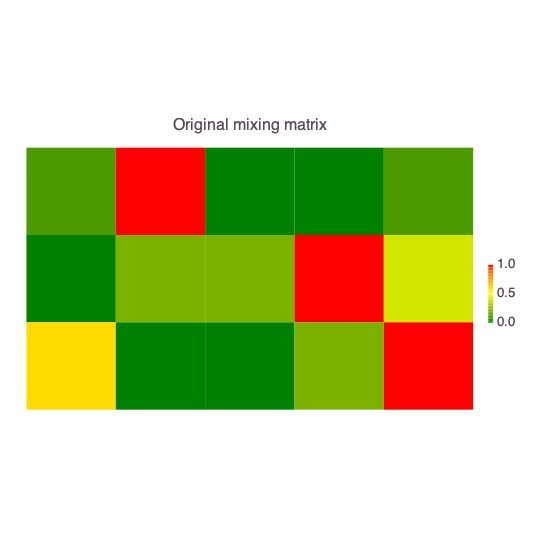

In [13]:
NMFk.plotmatrix(H ./ maximum(H; dims=2); title="Original mixing matrix")

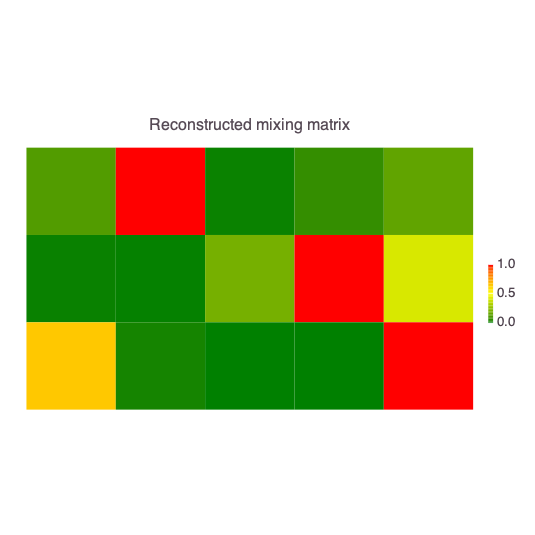

In [14]:
NMFk.plotmatrix(He ./ maximum(He; dims=2); title="Reconstructed mixing matrix")

Math behind NMF
=
**NMF** splits up a non-negative data matrix ($\mathbf{X}$) into two smaller rank matrices $\mathbf{W}$ and $\mathbf{H}$
It minimizes the following function:

$$
\Vert \mathbf{X} - \mathbf{W} \times \mathbf{H} \Vert_2
$$

**NMF** starts with either random or specified initialization of $\mathbf{W}$ and $\mathbf{H}$.

Finally, **NMF** estimates $\mathbf{W}$ and $\mathbf{H}$ that approvimate $\mathbf{X}$.